In [1]:
import pandas as pd
import seaborn as sb
import geopandas as gpd
import math
import matplotlib.pyplot as plt
low_memory = False
%matplotlib inline

In [2]:
focos = gpd.read_file("./hackaton/Focos/Focos.2018-01-01.2018-12-31.shp")

In [3]:
focos.head()

,DataHora,Satelite,Pais,Estado,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry
0,2018/01/01 16:10:00,AQUA_M-T,Brasil,BAHIA,CORRENTINA,Cerrado,0,6.75,0.27,-13.226,-44.977,None,42.7,POINT (-44.977 -13.226)
1,2018/01/01 16:10:00,AQUA_M-T,Brasil,BAHIA,PRADO,Mata Atlantica,0,4.43,0.01,-17.359,-39.302,None,6.8,POINT (-39.302 -17.359)
2,2018/01/01 16:10:00,AQUA_M-T,Brasil,MINAS GERAIS,TAIOBEIRAS,Cerrado,0,13.05,0.01,-15.698,-42.029,None,12.5,POINT (-42.029 -15.698)
3,2018/01/01 16:15:00,AQUA_M-T,Brasil,MARANHAO,ALTO ALEGRE DO PINDARE,Amazonia,0,0.00,0.04,-4.058,-46.177,None,96.7,POINT (-46.177 -4.058)
4,2018/01/01 16:15:00,AQUA_M-T,Brasil,ALAGOAS,CORURIPE,Mata Atlantica,0,0.00,1.00,-10.149,-36.348,None,18.2,POINT (-36.348 -10.149)


In [4]:
focos.groupby("Estado").count()

,DataHora,Satelite,Pais,Municipi,Bioma,DiaSemCh,Precipit,RiscoFog,Latitude,Longitud,AreaIndu,FRP,geometry
Estado,,,,,,,,,,,,,
ACRE,6626,6626,6626,6626,6626,6626,6626,6624,6626,6626,0,6626,6626
ALAGOAS,201,201,201,201,201,201,201,199,201,201,0,201,201
AMAPA,1206,1206,1206,1206,1206,1206,1206,1149,1206,1206,0,1206,1206
AMAZONAS,11446,11446,11446,11446,11446,11446,11446,11025,11446,11446,0,11446,11446
BAHIA,4956,4956,4956,4956,4956,4956,4956,4939,4956,4956,0,4956,4956
CEARA,3034,3034,3034,3034,3034,3034,3034,766,3034,3034,0,3034,3034
DISTRITO FEDERAL,88,88,88,88,88,88,88,84,88,88,0,88,88
ESPIRITO SANTO,205,205,205,205,205,205,205,202,205,205,0,205,205
GOIAS,3110,3110,3110,3110,3110,3110,3110,3087,3110,3110,0,3110,3110


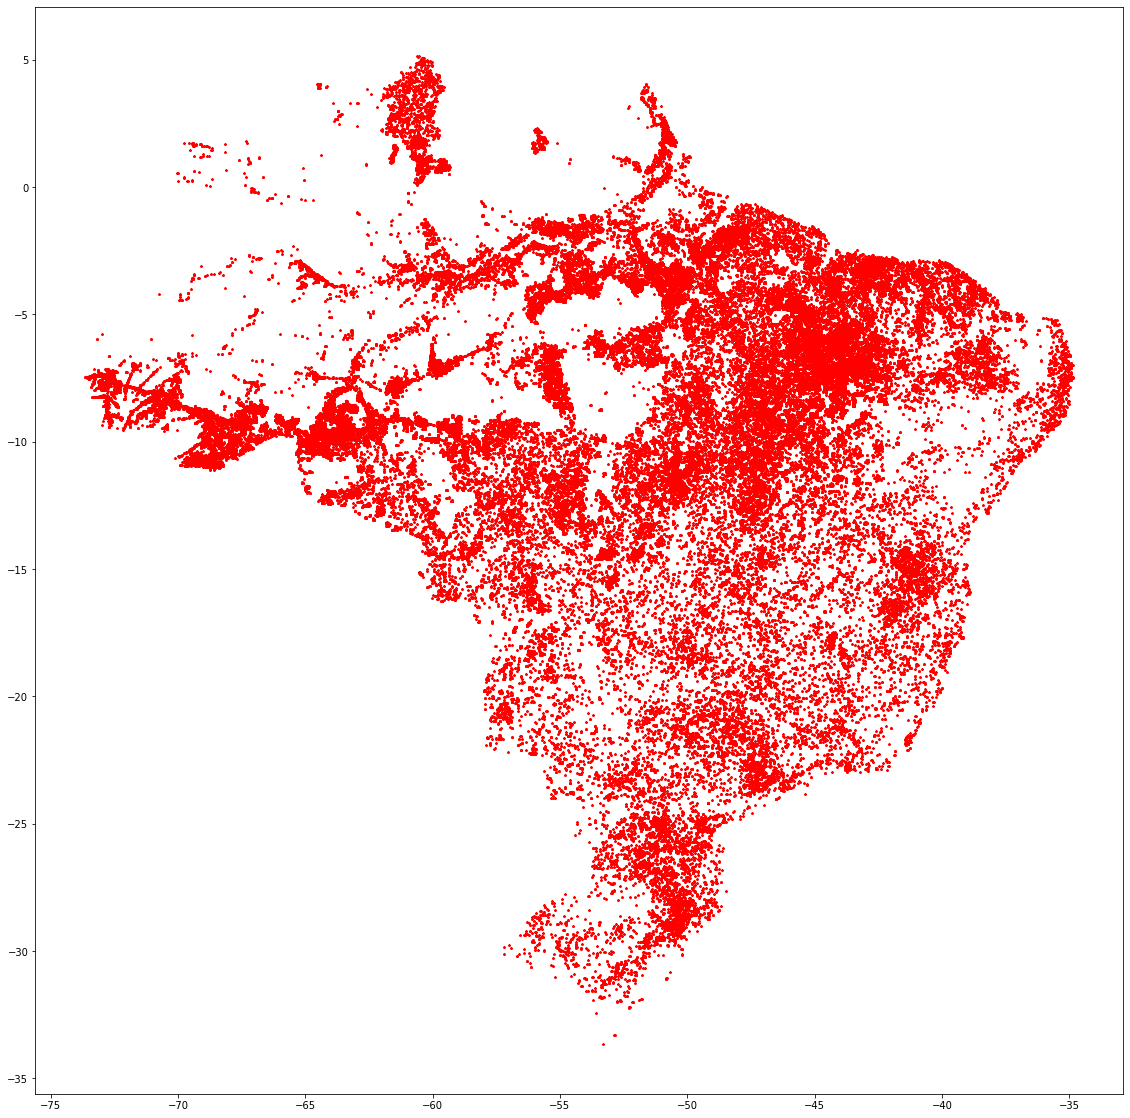

In [5]:
focos.plot( marker = '*', color = 'red', markersize = 5, figsize = (20,20) )

In [6]:
uf = gpd.read_file("./br-uf/BRUFE250GC_SIR.shp")

In [7]:
uf.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,ACRE,NORTE,12,POLYGON ((-73.18252539399994 -7.33549646399998...
1,ALAGOAS,NORDESTE,27,POLYGON ((-35.46753162599998 -8.81743564899995...
2,AMAPÁ,NORTE,16,(POLYGON ((-50.18122558799991 1.90098524900002...
3,AMAZONAS,NORTE,13,"POLYGON ((-67.32608847099995 2.02971390600004,..."
4,BAHIA,NORDESTE,29,(POLYGON ((-38.65483855899993 -18.042418703999...


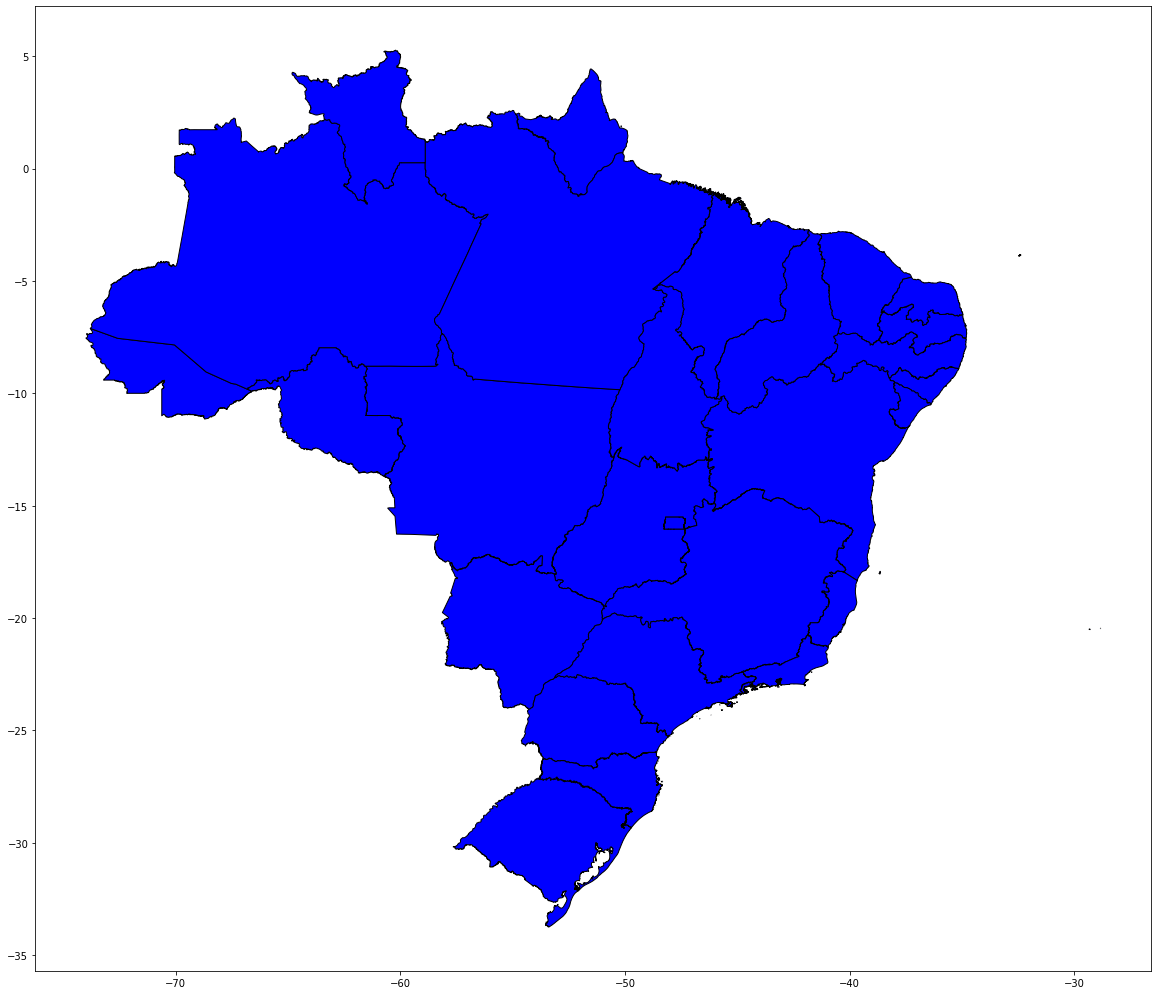

In [8]:
uf.plot(color = 'blue', edgecolor = 'black', figsize = (20, 20))

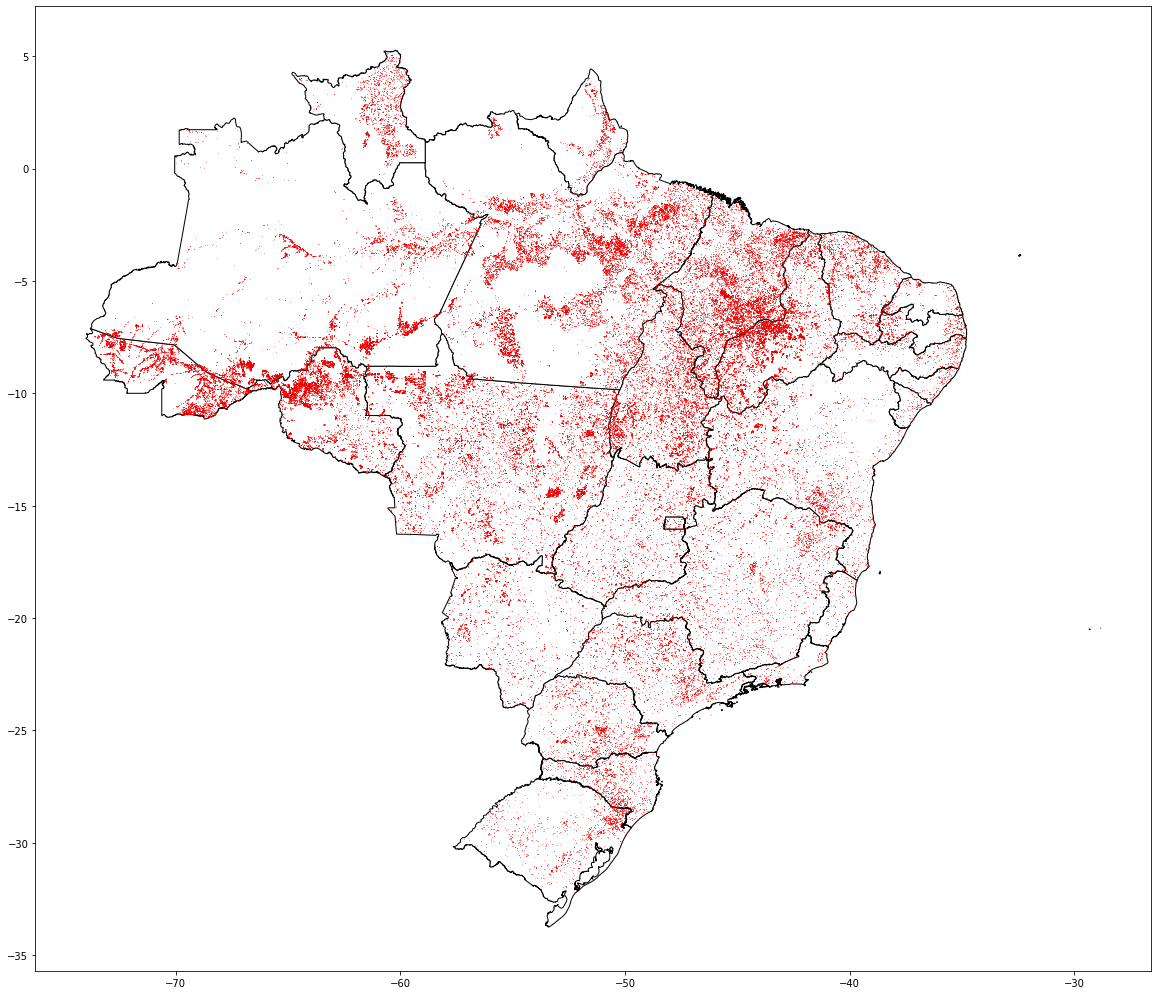

In [9]:
base = uf.plot(color = 'white', edgecolor = 'black', figsize = (20, 20))
focos.plot(ax = base, marker = 'o', color = 'red', markersize = 0.5, edgecolor = 'black', linewidth = 0.01)

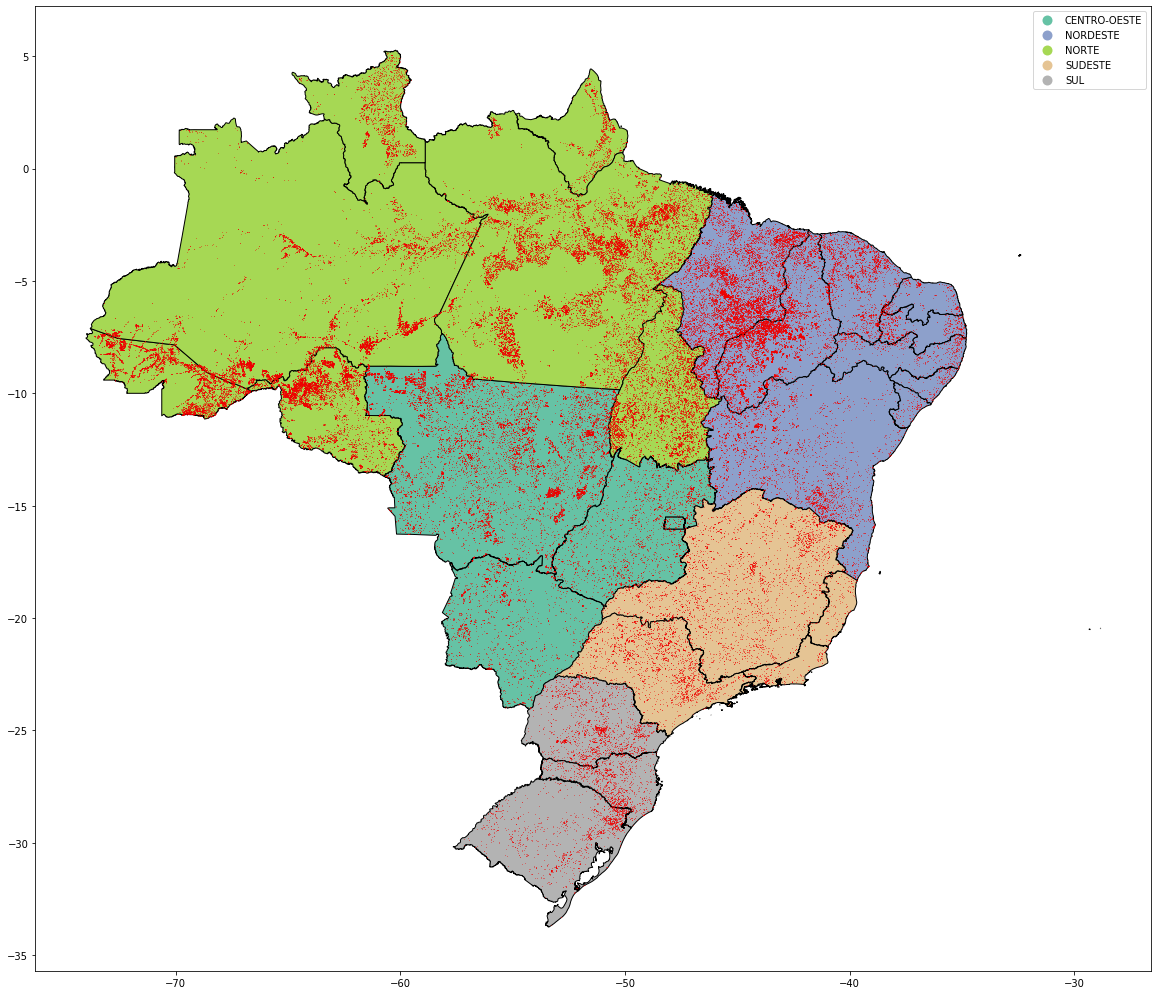

In [10]:
fig, ax = plt.subplots(figsize = (20,20))

uf.plot(ax = ax, cmap = 'Set2', column = 'NM_REGIAO', edgecolor = 'black', legend = True)

focos.plot(ax = ax, marker = 'o', color = 'red', markersize = 0.5, edgecolor = 'black', linewidth = 0.01)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

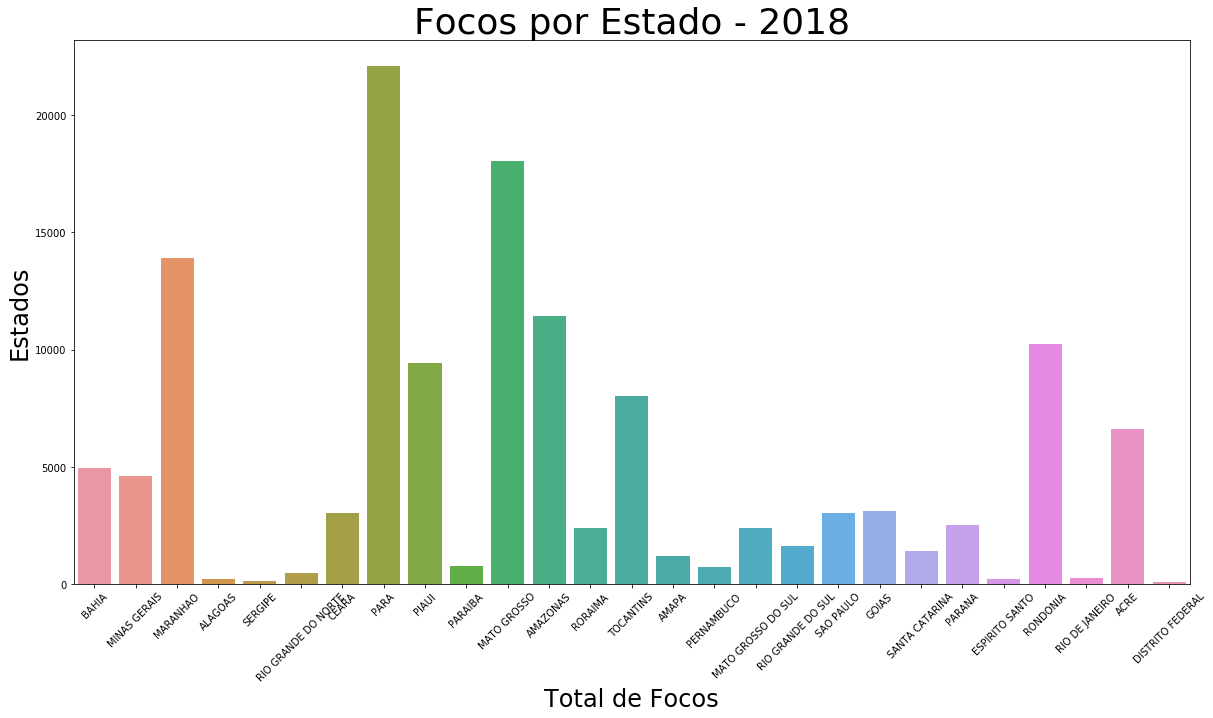

In [11]:
fig, ax = plt.subplots(figsize = (20,10))

sb.countplot(x = "Estado", data = focos, ax = ax)
ax.set_title("Focos por Estado - 2018", fontsize = 36)
plt.xlabel("Total de Focos", fontsize = 24)
plt.ylabel("Estados", fontsize = 24)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

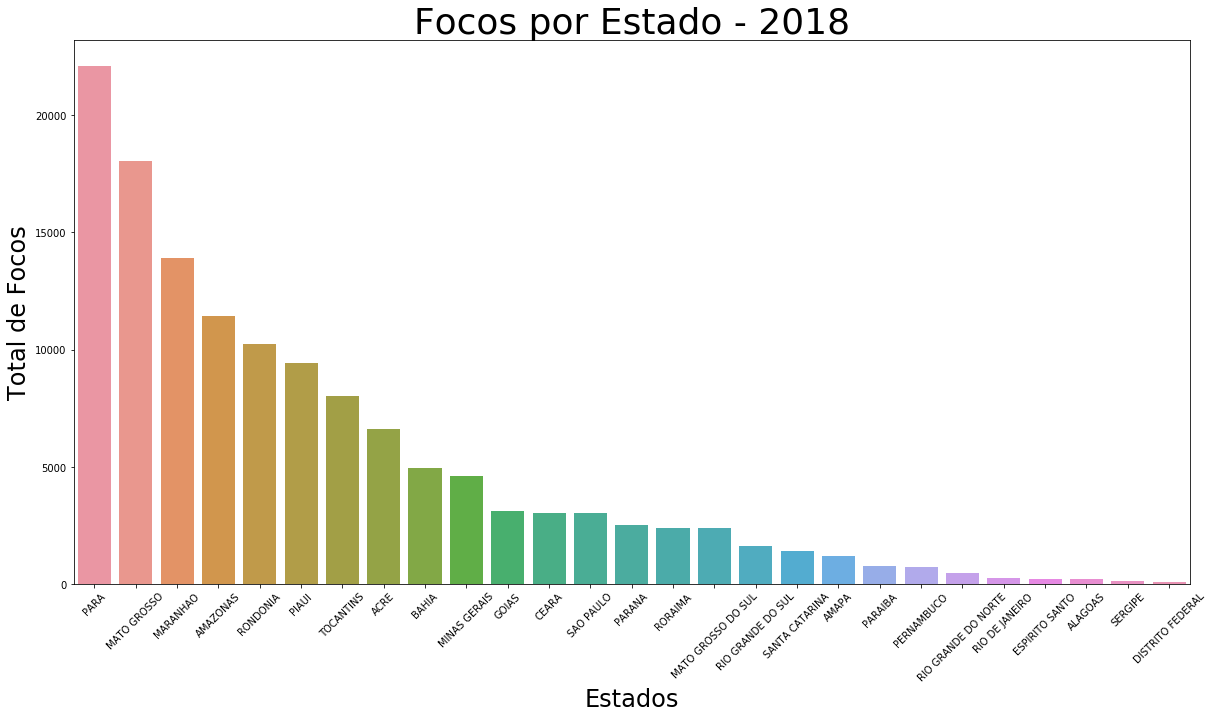

In [24]:
fig, ax = plt.subplots(figsize = (20,10))

sb.countplot(x = "Estado", data = focos, order = focos["Estado"].value_counts().index, ax = ax)
ax.set_title("Focos por Estado - 2018", fontsize = 36)
plt.xlabel("Estados", fontsize = 24)
plt.ylabel("Total de Focos", fontsize = 24)
plt.xticks(rotation = 45)

In [12]:
cicatriz_df = gpd.read_file("./hackaton/cicatrizes/df_conhecimento.shp")

In [13]:
cicatriz_df.head()

,ndvi_pre,ndvi_pos,ndvi_mdif,nbr_pre,nbr_pos,nbr_mdif,bai_pre,bai_pos,bai_mdif,gemi_pre,...,band7_pre,band7_pos,band7_mdif,gid,id_cena,op,data_pas,classe,aneel,geometry
0,4033,3057,25,1197,-1675,253,21,80,-259,-42,...,2186,2446,-9,2863387,LS82190662018306,219_066,2018-11-02,queimada,1,POLYGON ((-43.71140647299239 -8.05464302674571...
1,5551,4353,23,1262,-638,150,36,43,-19,-323,...,1771,2340,-35,2828913,LS82190642018194,219_064,2018-07-13,nao_queimada,1,POLYGON ((-42.8256980221989 -5.301079304891122...
2,4973,3587,24,1144,-17,97,54,98,-68,-289,...,1478,1502,-2,2828942,LS82190642018194,219_064,2018-07-13,queimada,1,POLYGON ((-42.69900256534447 -5.32231521926869...
3,6203,4414,18,3683,630,56,23,76,-130,-370,...,1245,1494,-18,2828959,LS82190642018194,219_064,2018-07-13,nao_queimada,1,POLYGON ((-42.78175197747964 -5.33346659835771...
4,4634,3171,31,795,-785,211,31,43,-41,-209,...,2044,2465,-20,2837086,LS82210652018176,221_065,2018-06-25,nao_queimada,1,POLYGON ((-45.36366827945385 -7.44889075351178...


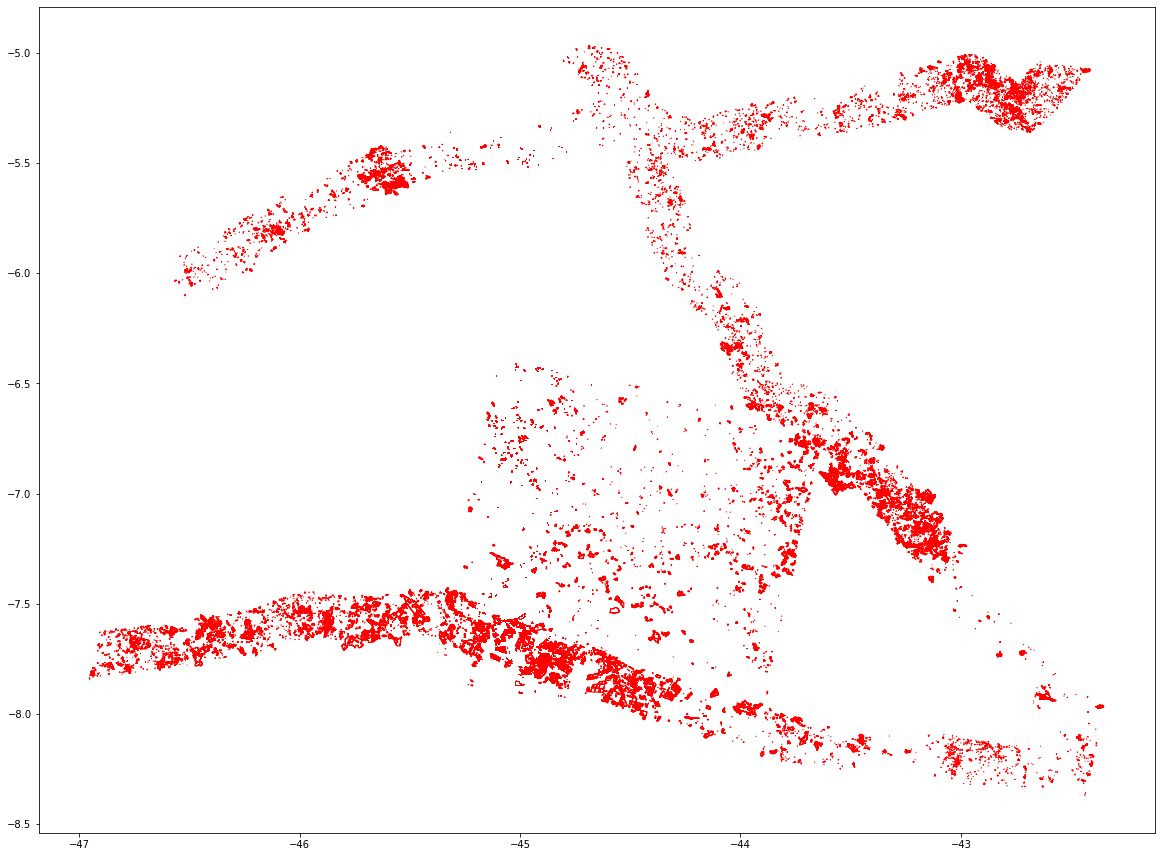

In [14]:
cicatriz_df.plot(color = 'white', edgecolor = 'red', figsize = (20, 20))

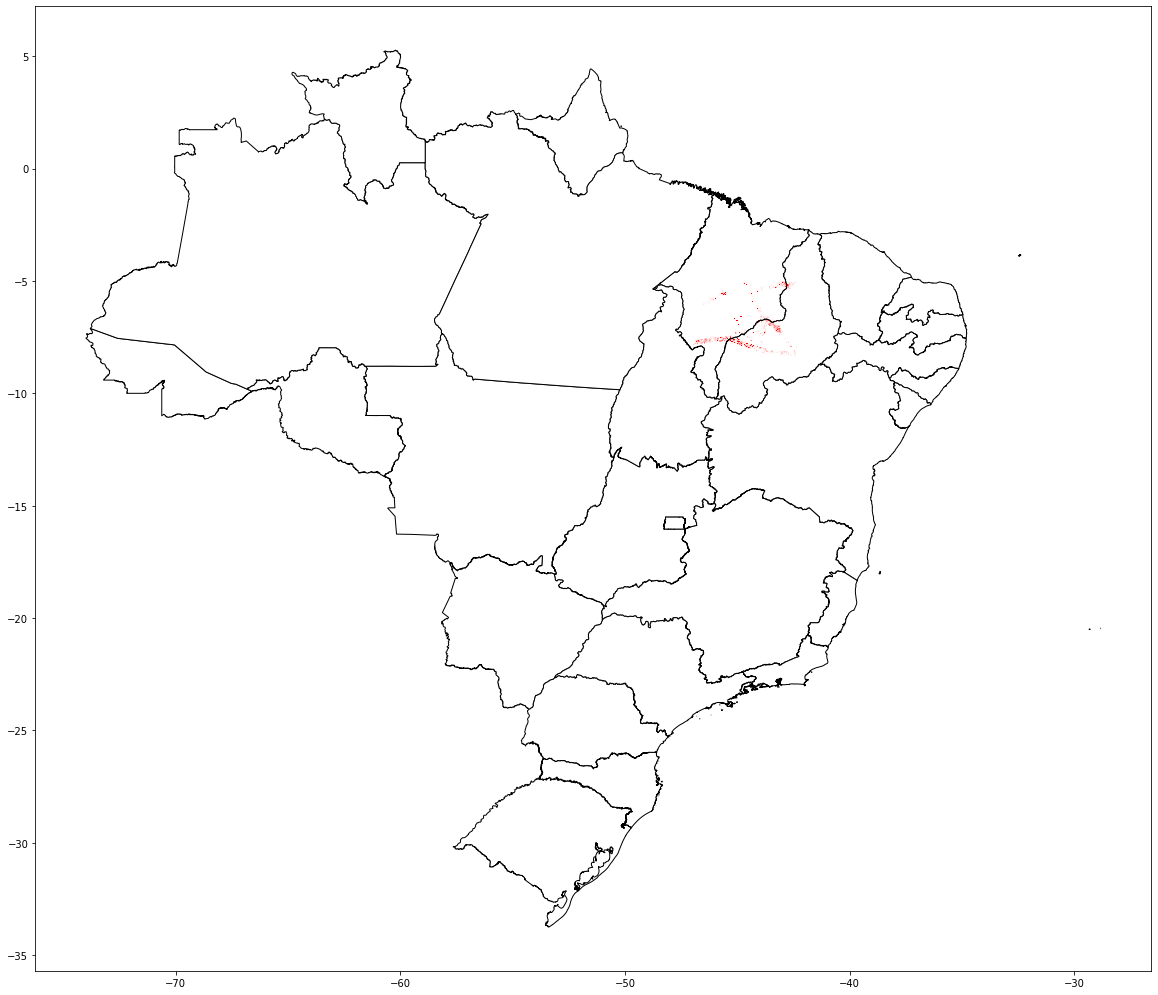

In [15]:
base = uf.plot(color = 'white', edgecolor = 'black', figsize = (20, 20))
cicatriz_df.plot(ax = base, color = 'red', edgecolor = 'red', linewidth = 0.01)

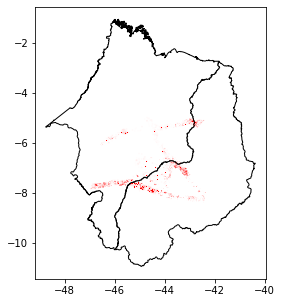

In [16]:
base = uf[(uf["NM_ESTADO"] == "MARANHÃO") | (uf["NM_ESTADO"] == "PIAUÍ")].plot(color = 'white', edgecolor = 'black', figsize = (5,5))
cicatriz_df.plot(ax = base, color = 'red', edgecolor = 'red', linewidth = 0.01)

In [17]:
ma = uf[(uf["NM_ESTADO"] == "MARANHÃO")]
ma.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
9,MARANHÃO,NORDESTE,21,(POLYGON ((-43.99912974699998 -2.3927162649999...


In [18]:
pi = uf[(uf["NM_ESTADO"] == "PIAUÍ")]
pi.head()

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
17,PIAUÍ,NORDESTE,22,POLYGON ((-41.74604645399995 -2.80349720200001...


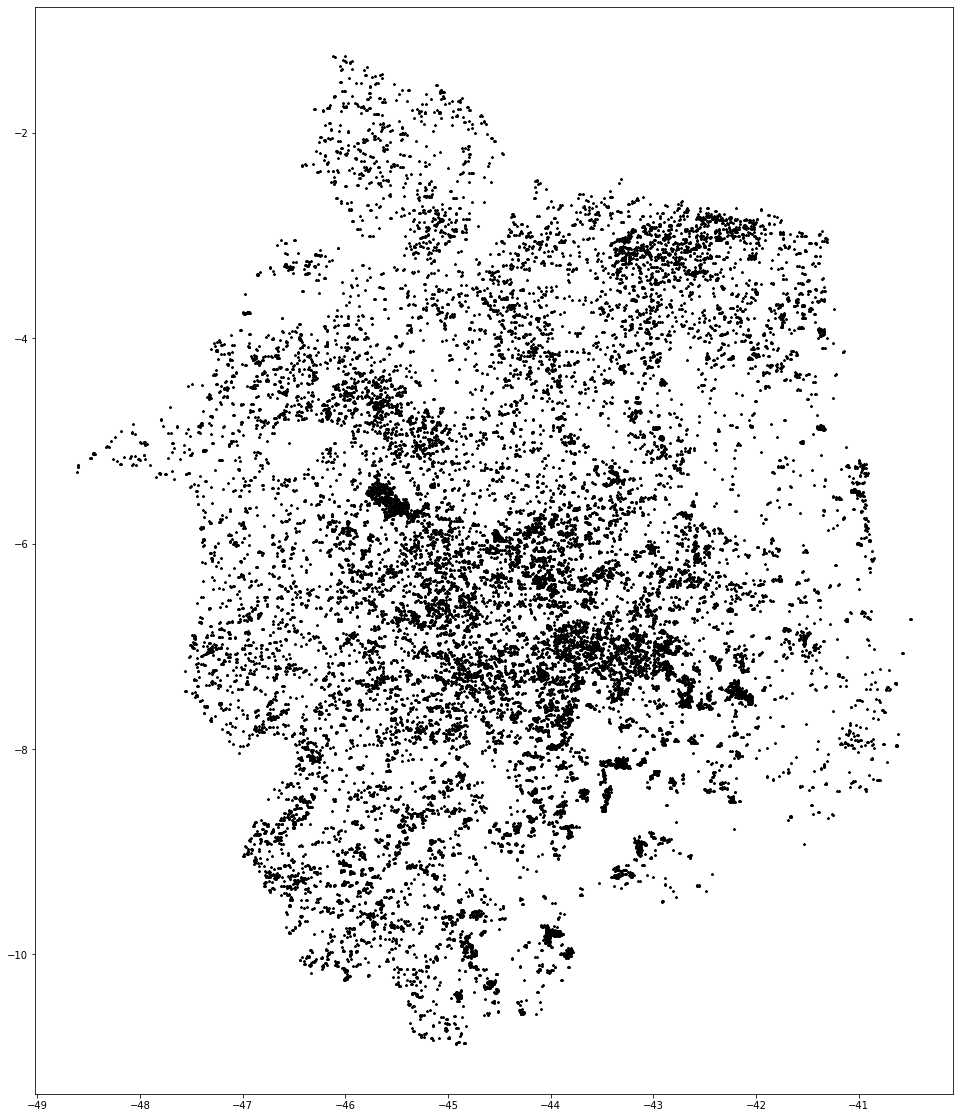

In [19]:
focos[
    (focos["Estado"] == "MARANHAO") | (focos["Estado"] == "PIAUI")
    ].plot(marker = '*', color = 'black', markersize = 5, figsize = (20,20))

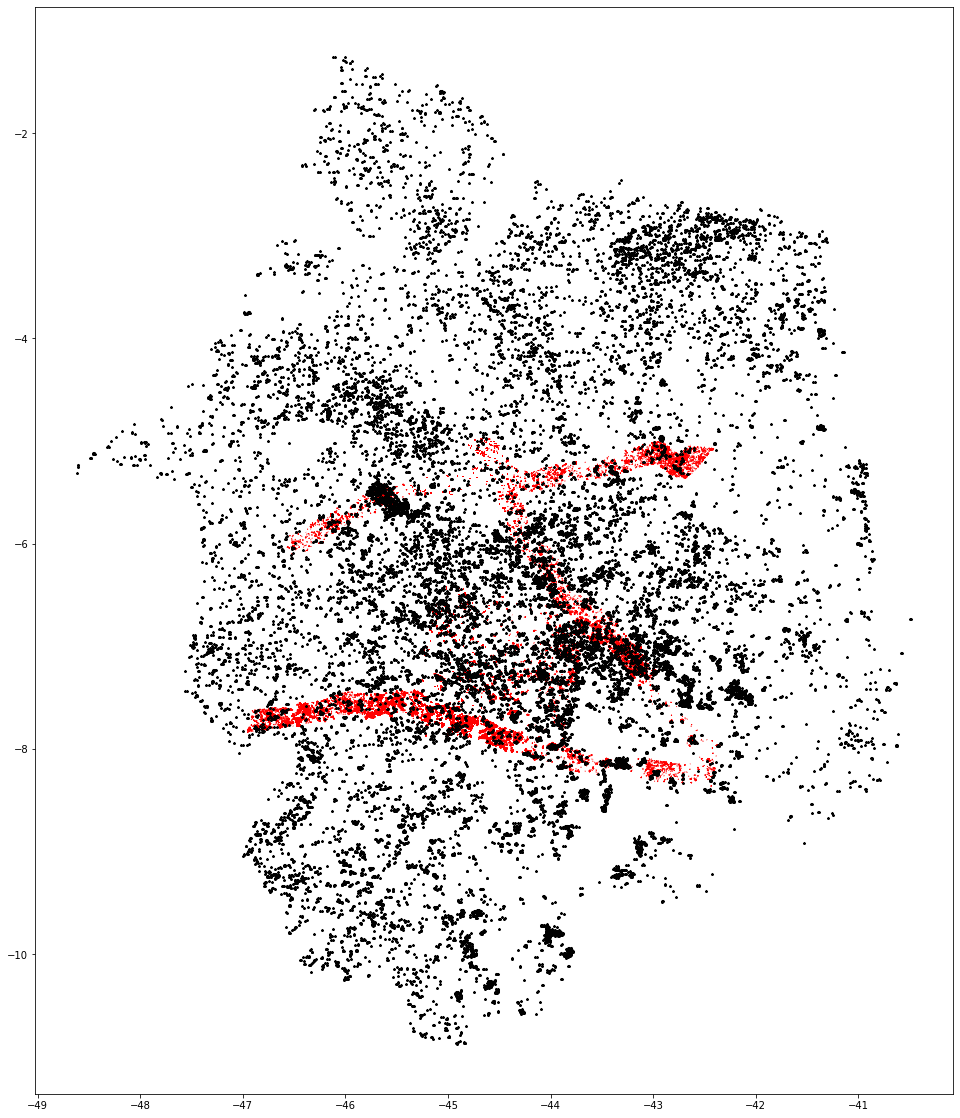

In [20]:
base = cicatriz_df.plot(color = 'white', edgecolor = 'red', figsize = (20, 20))

focos[
    (focos["Estado"] == "MARANHAO") | (focos["Estado"] == "PIAUI")
    ].plot(ax = base, marker = '*', color = 'black', markersize = 5, figsize = (20,20))